In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


import os


In [5]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


<Axes: >

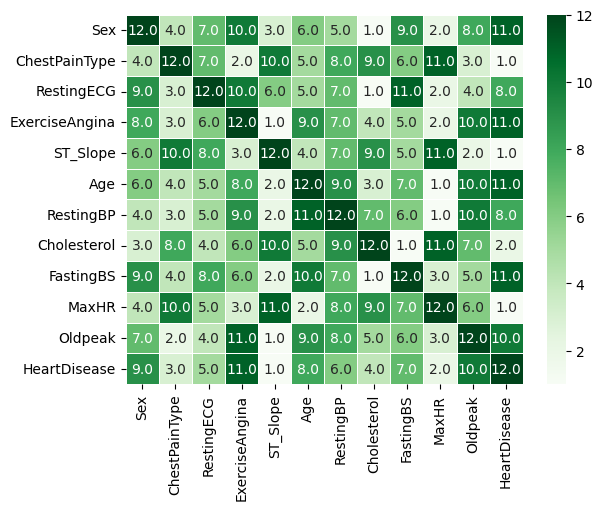

In [8]:
lab = LabelEncoder()
obj = df.select_dtypes(include='object')
not_obj = df.select_dtypes(exclude='object')

for i in range(0, obj.shape[1]):
    obj.iloc[:, i] = lab.fit_transform(obj.iloc[:, i])

df_new = pd.concat([obj, not_obj], axis=1)
corr = df_new.corr()
sns.heatmap(corr.rank(axis='columns'), annot=True, fmt='.1f', linewidth=.6, cmap='Greens')


In [14]:

X = df_new.drop('HeartDisease', axis=1)
y = df_new['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Algorithm = ['RandonForestClassifier', 'DecisionTreeClassifier', ' KNeighborsClassifier', 'LogisticRegression', 'Naive Bayes']
Accuracy=[]

In [16]:
def algorithm(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, prediction)
    
    print('confusion matrix')
    cm = confusion_matrix(y_test, prediction)
    
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    
    plt.title('Confusion Matrix')
    plt.xlabel('predicted label')
    plt.ylabel('True label')
    plt.show()
    
    print(cm)
    print(classification_report(y_test, prediction))
    final_score = accuracy * 100
    print('accuracy score : ', final_score)
    
    Accuracy.append(accuracy * 100)


confusion matrix


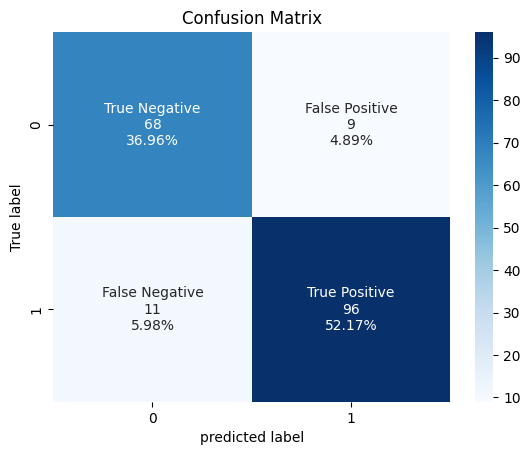

[[68  9]
 [11 96]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

accuracy score :  89.13043478260869


In [17]:
model_1 = RandomForestClassifier(n_estimators=100)
algorithm(model_1)

confusion matrix


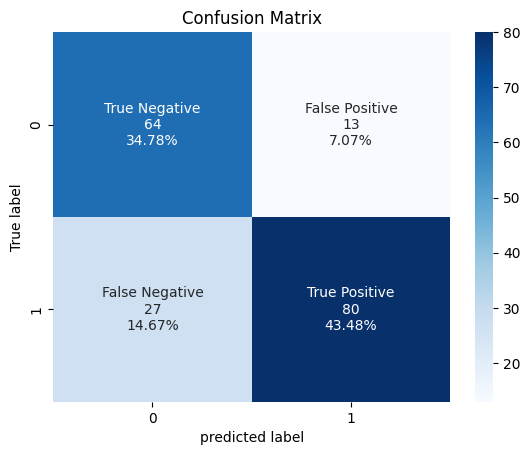

[[64 13]
 [27 80]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184

accuracy score :  78.26086956521739


In [18]:
model_2 =DecisionTreeClassifier(random_state=42)
algorithm(model_2)

confusion matrix


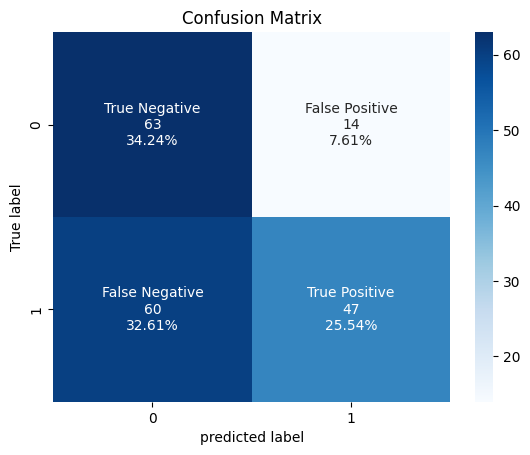

[[63 14]
 [60 47]]
              precision    recall  f1-score   support

           0       0.51      0.82      0.63        77
           1       0.77      0.44      0.56       107

    accuracy                           0.60       184
   macro avg       0.64      0.63      0.59       184
weighted avg       0.66      0.60      0.59       184

accuracy score :  59.78260869565217


In [19]:
model_3 = KNeighborsClassifier(n_neighbors=2)
algorithm(model_3)

confusion matrix


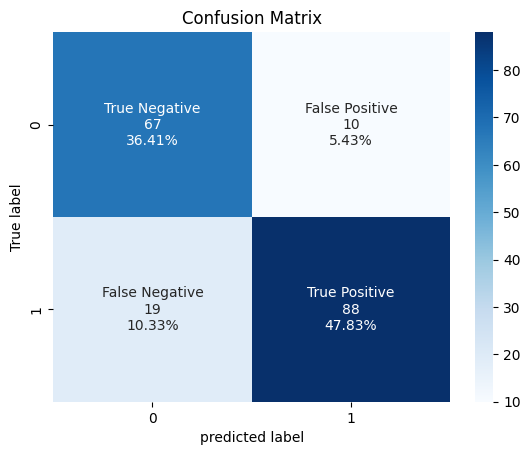

[[67 10]
 [19 88]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

accuracy score :  84.23913043478261


In [21]:
model_4 = LogisticRegression()
algorithm(model_4)

confusion matrix


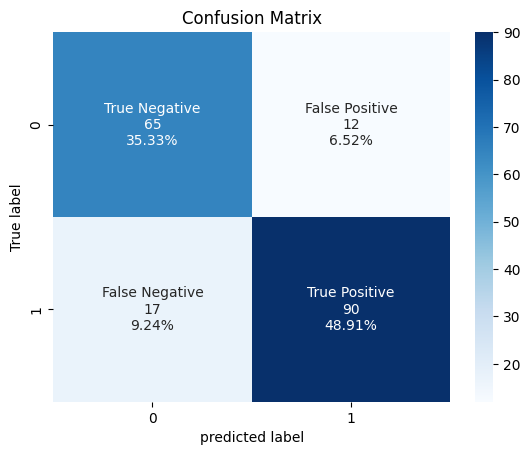

[[65 12]
 [17 90]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

accuracy score :  84.23913043478261


In [22]:
model_5 = GaussianNB()
algorithm(model_5)

In [24]:
score = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy})
score

,Algorithm,Accuracy
0,RandonForestClassifier,89.130435
1,DecisionTreeClassifier,78.260870
2,KNeighborsClassifier,59.782609
3,LogisticRegression,84.239130
4,Naive Bayes,84.239130


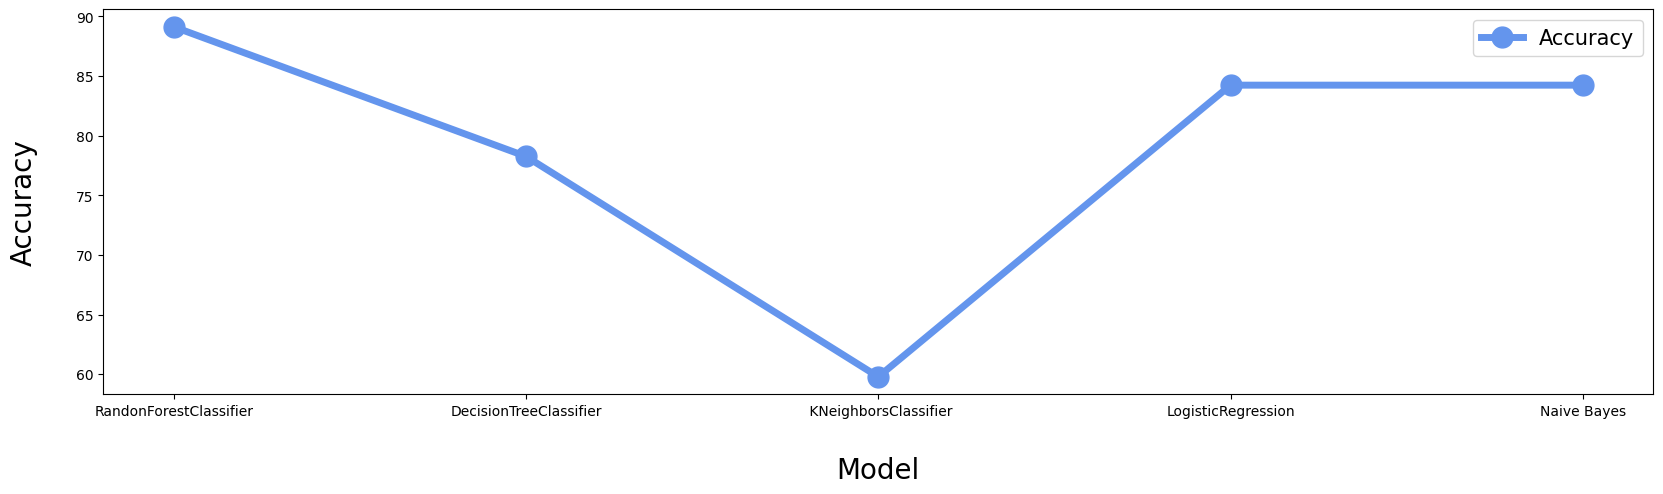

In [25]:
fig = plt.figure(figsize=(20, 5))
plt.plot(score.Algorithm, score.Accuracy, label='Accuracy', lw=5, color='CornflowerBlue', marker='o', markersize=15)
plt.legend(fontsize=15)
plt.xlabel('\nModel', fontsize=20)
plt.ylabel('Accuracy\n', fontsize=20)
plt.show()
